In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from pandas import DataFrame
import operator
import matplotlib.cm as cm

In [2]:
x = pd.read_csv('data_cleaned_avg_cluster2.csv')
x = x.drop(['date', 'Address',], axis=1)

X_after, test = train_test_split(x, test_size=0.2, random_state=42)
# test.to_csv(r'data_test_daily_c.csv', index = False, header=True)

X_after, test_daily = train_test_split(X_after, test_size=0.125, random_state=42)
# test.to_csv(r'data_test_final_c.csv', index = False, header=True)

colors = 10*[
    'green', 'red', 'cyan', 'blue', 'black', 'yellow', 'magenta'
]

In [3]:
X_after.head()

,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
23066,37.544962,127.136792,0.003333,0.024833,0.030333,0.404167,24.458333,13.375000
3263,37.487355,126.927102,0.003583,0.032000,0.030583,0.625000,50.666667,45.458333
24329,37.480917,126.971481,0.004000,0.023556,0.020444,0.438889,40.611111,25.000000
3190,37.540033,127.004850,0.003000,0.033800,0.006333,0.600000,38.533333,29.133333
9665,37.452357,126.908296,0.005429,0.027429,0.070143,0.628571,85.285714,53.571429


In [4]:
class K_means(object):

#     def __init__(self, k=3):
#         self.k = k

    def train(self, data, k, verbose=0):

        shape = data.shape

        ranges = np.zeros((shape[1], 5))
        centroids = np.zeros((shape[1], 5))

        for dim in range(shape[1]):
            ranges[dim, 0] = np.min(data[:,dim])
            ranges[dim, 1] = np.max(data[:,dim])

        if verbose == 1:
            print('Ranges: ')
            print(ranges)

        centroids = np.zeros((k, shape[1]))
        for i in range(k):
            for dim in range(shape[1]):
                centroids[i, dim] = np.random.uniform(ranges[dim, 0], ranges[dim, 1], 1)

        if verbose == 1:
            print('Centroids: ')
            print(centroids)

            plt.scatter(data[:,0], data[:,1])
            plt.scatter(centroids[:,0], centroids[:,1], c = 'r')
            plt.show()

        count = 0
        while True:
            count += 1
            if verbose == 1:
                print('-----------------------------------------------')
                print('Iteration: ', count)

            distances = np.zeros((shape[0],k))
            for ix, i in enumerate(data):
                for ic, c in enumerate(centroids):
                    distances[ix, ic] = np.sqrt(np.sum((i-c)**2))

            labels = np.argmin(distances, axis = 1)

            new_centroids = np.zeros((k, shape[1]))
            for centroid in range(k):
                temp = data[labels == centroid]
                if len(temp) == 0:
                    return 0
                for dim in range(shape[1]): 
                    new_centroids[centroid, dim] = np.mean(temp[:,dim])

            if verbose == 1:
                plt.scatter(data[:,0], data[:,1], c = labels)
                plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'r')
                plt.show()

            if np.linalg.norm(new_centroids - centroids) < np.finfo(float).eps:
                print("DONE!")
                plt.scatter(data[:,0], data[:,1], c = labels)
                plt.scatter(new_centroids[:,0], new_centroids[:,1], c = 'r')
                plt.show()
                break

            centroids = new_centroids
        self.centroids = centroids
        self.labels = labels
        if verbose == 1:
            print(labels)
            print(centroids)
        return 1

    def getAverageDistance(self, data):

        dists = np.zeros((len(self.centroids),))
        for ix, centroid in enumerate(self.centroids):
            temp = data[self.labels == ix]
            dist = 0
            for i in temp:
                dist += np.linalg.norm(i - centroid)
            dists[ix] = dist/len(temp)
        return dists

    def getLabels(self):
        return self.labels

In [5]:
x2 = X_after[['Latitude','Longitude', 'O3','SO2', 'NO2' ]].copy()
x2.head()

,Latitude,Longitude,O3,SO2,NO2
23066,37.544962,127.136792,0.030333,0.003333,0.024833
3263,37.487355,126.927102,0.030583,0.003583,0.032000
24329,37.480917,126.971481,0.020444,0.004000,0.023556
3190,37.540033,127.004850,0.006333,0.003000,0.033800
9665,37.452357,126.908296,0.070143,0.005429,0.027429


In [6]:
x_array = np.array(x2)
x_array

array([[3.75449625e+01, 1.27136792e+02, 3.03333333e-02, 3.33333333e-03,
        2.48333333e-02],
       [3.74873546e+01, 1.26927102e+02, 3.05833333e-02, 3.58333333e-03,
        3.20000000e-02],
       [3.74809167e+01, 1.26971481e+02, 2.04444444e-02, 4.00000000e-03,
        2.35555556e-02],
       ...,
       [3.75259388e+01, 1.26856603e+02, 2.81250000e-02, 3.58333333e-03,
        2.69583333e-02],
       [3.75259388e+01, 1.26856603e+02, 2.80476190e-02, 7.23809524e-03,
        4.94761905e-02],
       [3.75642629e+01, 1.26974676e+02, 2.00555556e-02, 4.88888889e-03,
        5.38333333e-02]])

DONE!


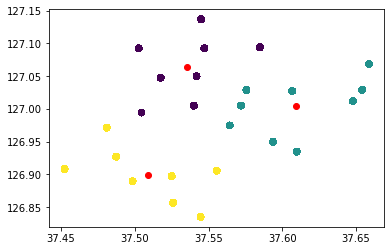

1

In [7]:
clf = K_means()
clf.train(x_array,3)

In [8]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x_array)
x_scaled

array([[-0.16595002,  1.86931965,  0.52780193, -0.69323812, -0.32624002],
       [-1.24396612, -0.79047987,  0.54846494, -0.50885886,  0.32403727],
       [-1.36443848, -0.22756026, -0.28953474, -0.20156009, -0.44218094],
       ...,
       [-0.52194034, -1.68472252,  0.34527872, -0.50885886, -0.13342525],
       [-0.52194034, -1.68472252,  0.33888302,  2.18659032,  1.9097633 ],
       [ 0.19521819, -0.18703343, -0.32167719,  0.45401061,  2.30511461]])

In [9]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iteration = kmeans.inertia_
    wcss.append(wcss_iteration)

In [10]:
wcss

[92969.99999999999,
 73033.30971437103,
 60065.16308300031,
 53930.2502138849,
 49016.60187495039,
 45046.70893923662,
 41942.3661106971,
 39565.9832288574,
 37670.38159175383,
 36097.454756350926]

<function matplotlib.pyplot.show(*args, **kw)>

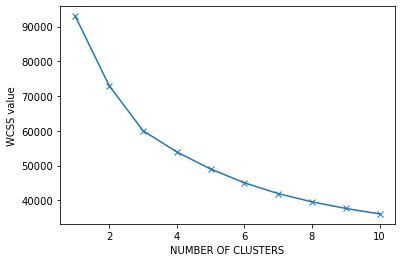

In [11]:
number_of_clusters = range(1,11)
plt.plot(number_of_clusters,wcss, marker='x')
plt.xlabel('NUMBER OF CLUSTERS')
plt.ylabel('WCSS value')
plt.show

DONE!


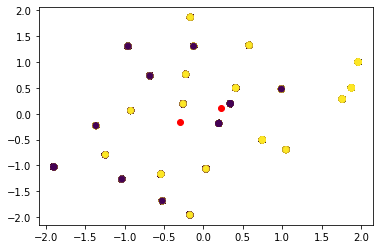

1

In [12]:
clf2 = K_means()
clf2.train(x_scaled,2)